# Objective 01 - Describe Convolution and Pooling
## Overview
In the previous module, we used a type of RNN and LSTM network, to predict text. Because of the structure of RNNs, they are very good at learning how to predict sequences, such as text.

Now, we're going to move onto a type of neural network used to learn about images. Convolutional neural networks or CNNs classify images, cluster images by similarity, and object recognition in images.

So, what is a convolutional neural network? It is a type of network that makes use of a mathematical operation called convolution. But, first, let's take a quick look at how the brain uses convolution to process images.

### The Brain and Image Recognition
You probably already know that the animal brain is good at image recognition. Animals are good at image recognition because of the organization of the visual cortex, or the part of the brain that processes images.

Individual neurons in the brain respond to stimuli from only part of the visual field. Neurons in some areas of the visual cortex respond to features in images at specific orientations. For example, some neurons might respond to bars or lines in a specific orientation; these neurons would be good at edge detection. Neurons in other areas process information about color and motion.

### Convolutional Neural Network

A CNN uses a similar structure: a convolutional layer in the network uses convolution to filter or convolve the input image and create an output. However, different filters have different results: some are good at detecting lines and edges, others are good at identifying other features in the image.

The output from all of this filtering or convolution is then fed into other hidden layers and finally the output to make a prediction.

Right now, we're going to go over an example of the convolution of an image; in the next part of the module, we'll implement a CNN for image classification.

## Follow Along

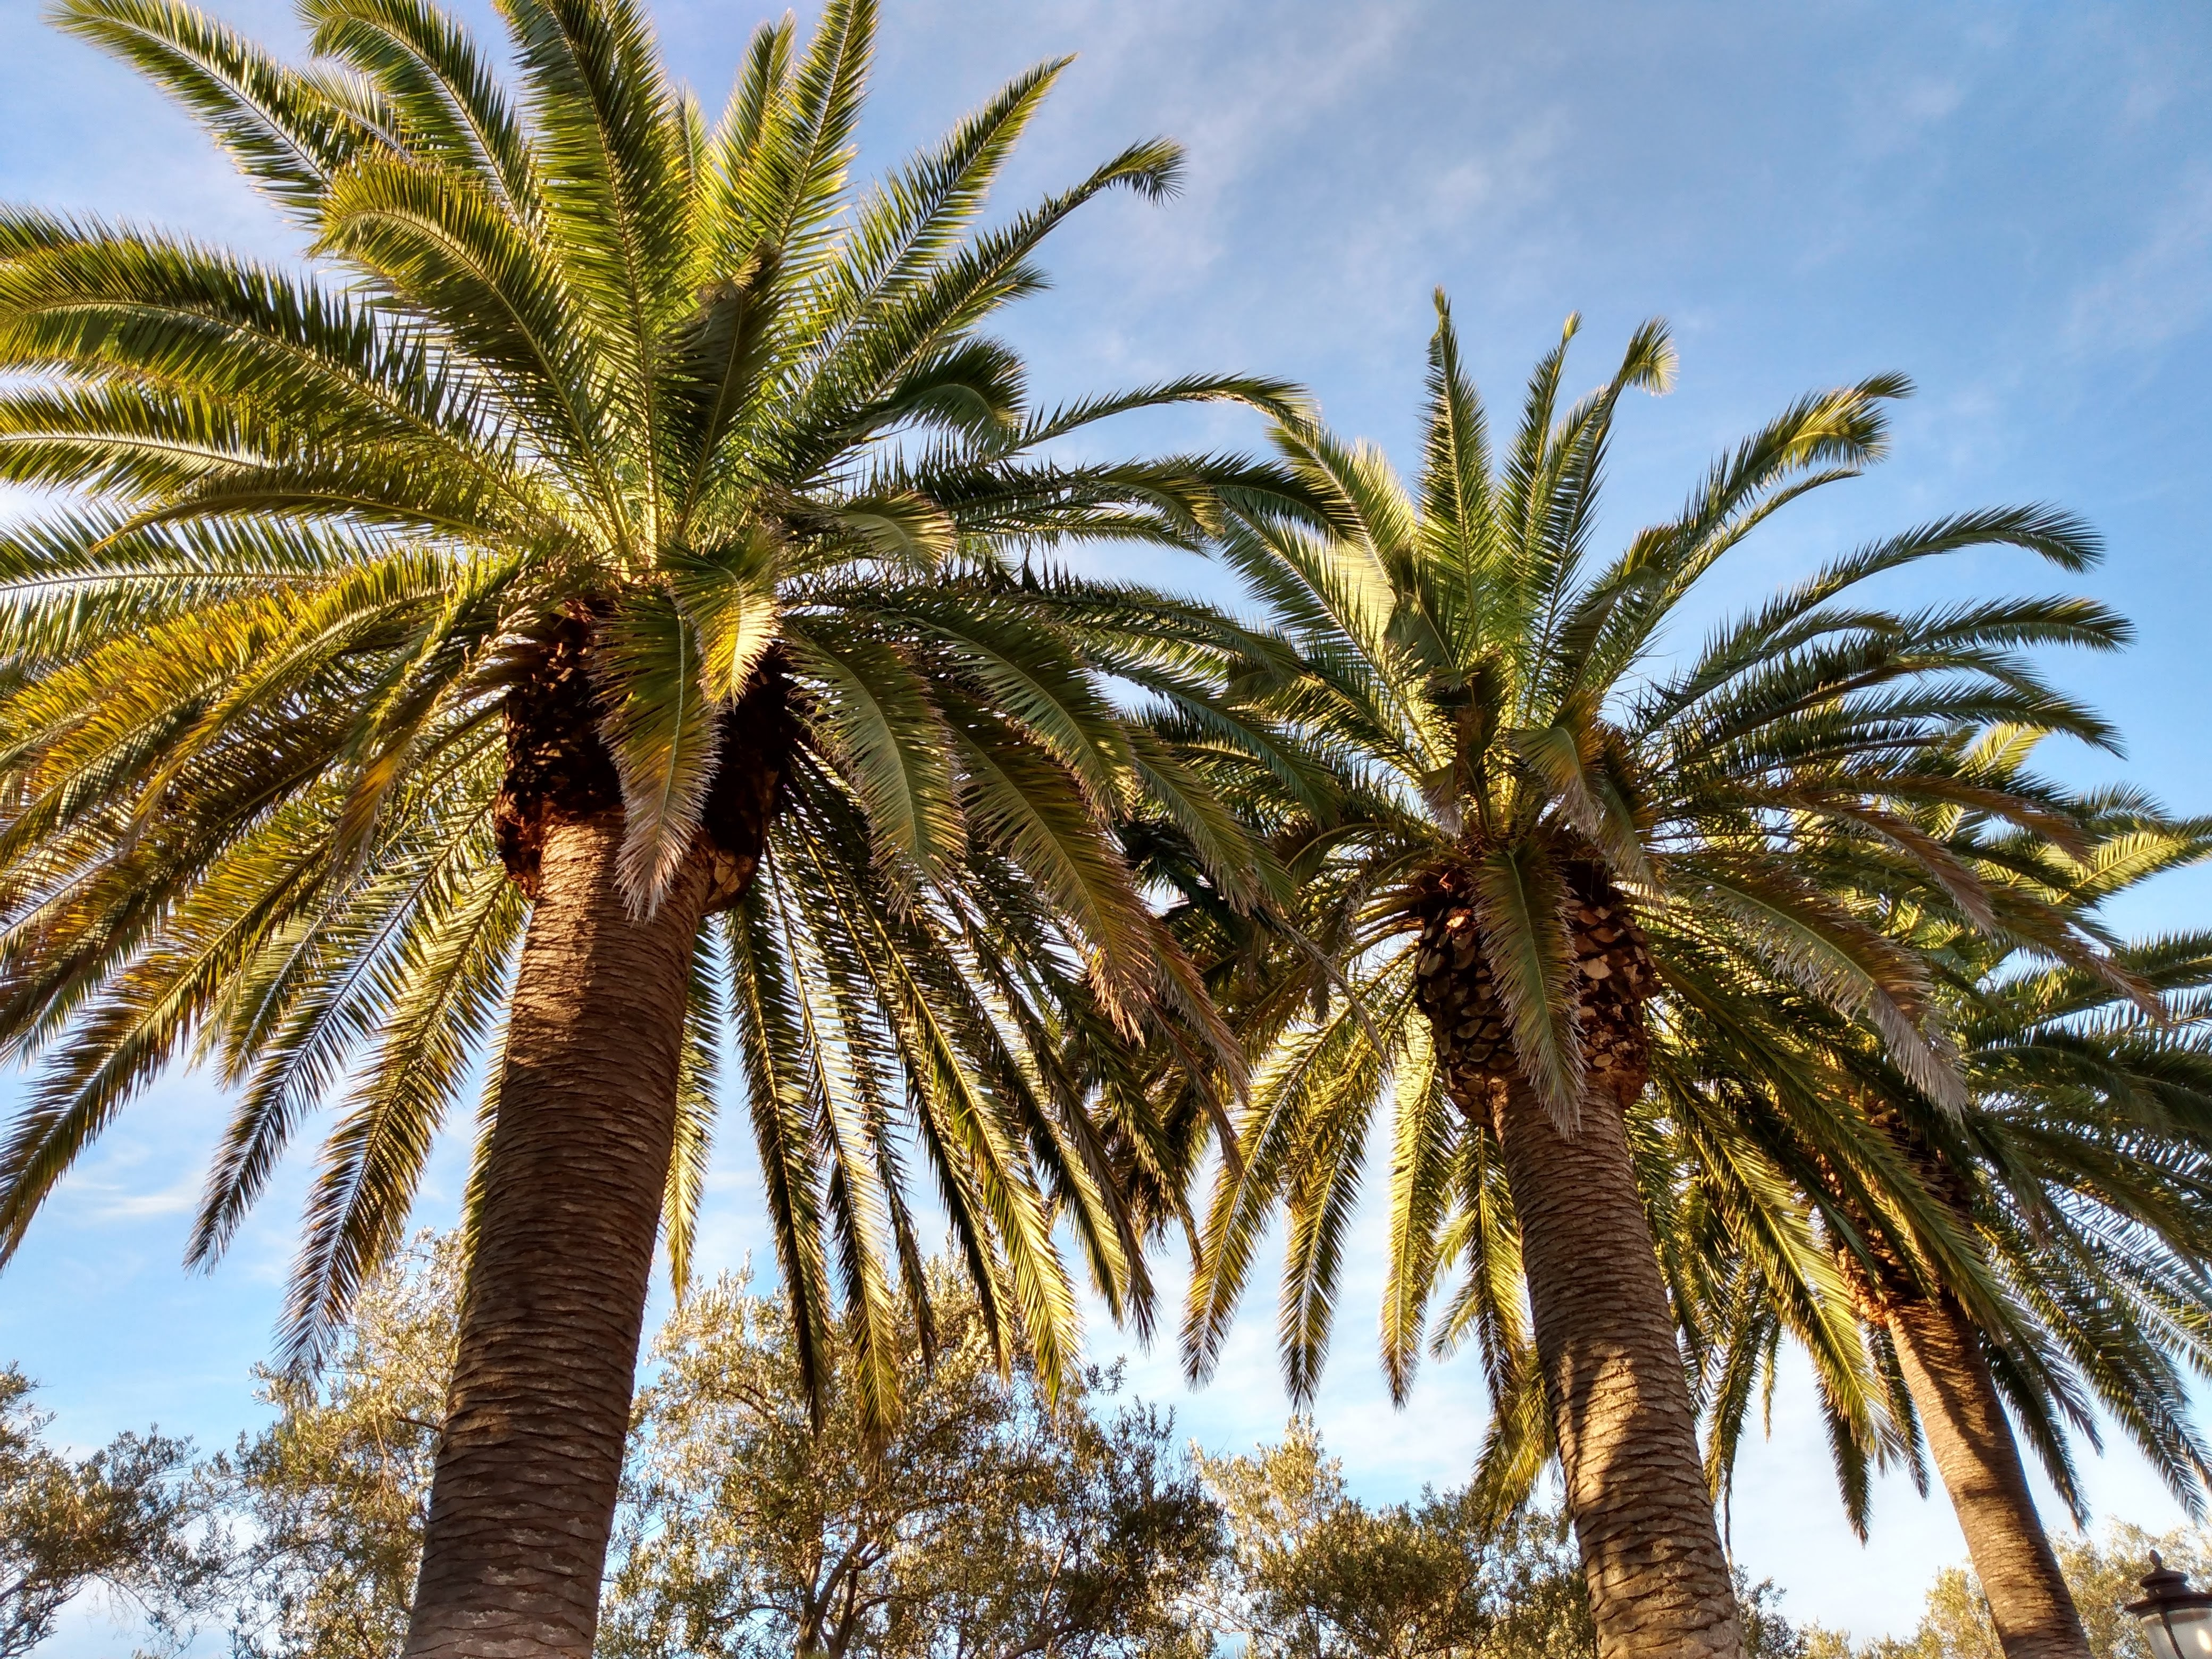

In [2]:
import requests

img_url = "https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-canvas-images/main/unit_4/palm_trees.jpg"

r = requests.get(img_url)
with open('palm_trees.jpg', 'wb') as f:
  f.write(r.content)

# Display the first image
from IPython.display import Image
Image(filename='palm_trees.jpg', width=500)

We have a pretty standard image of palm trees. Let's perform a convolution on this image. First, we'll do an edge detection which we implement with a high-pass filter. The edge detection means that we let through features that change abruptly in value; in this case, the edges of the leaves and trunk.

The kernel is the filter and is usually an array smaller in size than the image. In our example code below, the kernel is a 3x3 matrix with a larger positive value in the center surrounded by negative values. When this kernel is passed over or convolved with our input image, we should have a resulting image that's just the edges.

Example credit: https://pythonexamples.org/python-opencv-image-filter-convolution-cv2-filter2d/

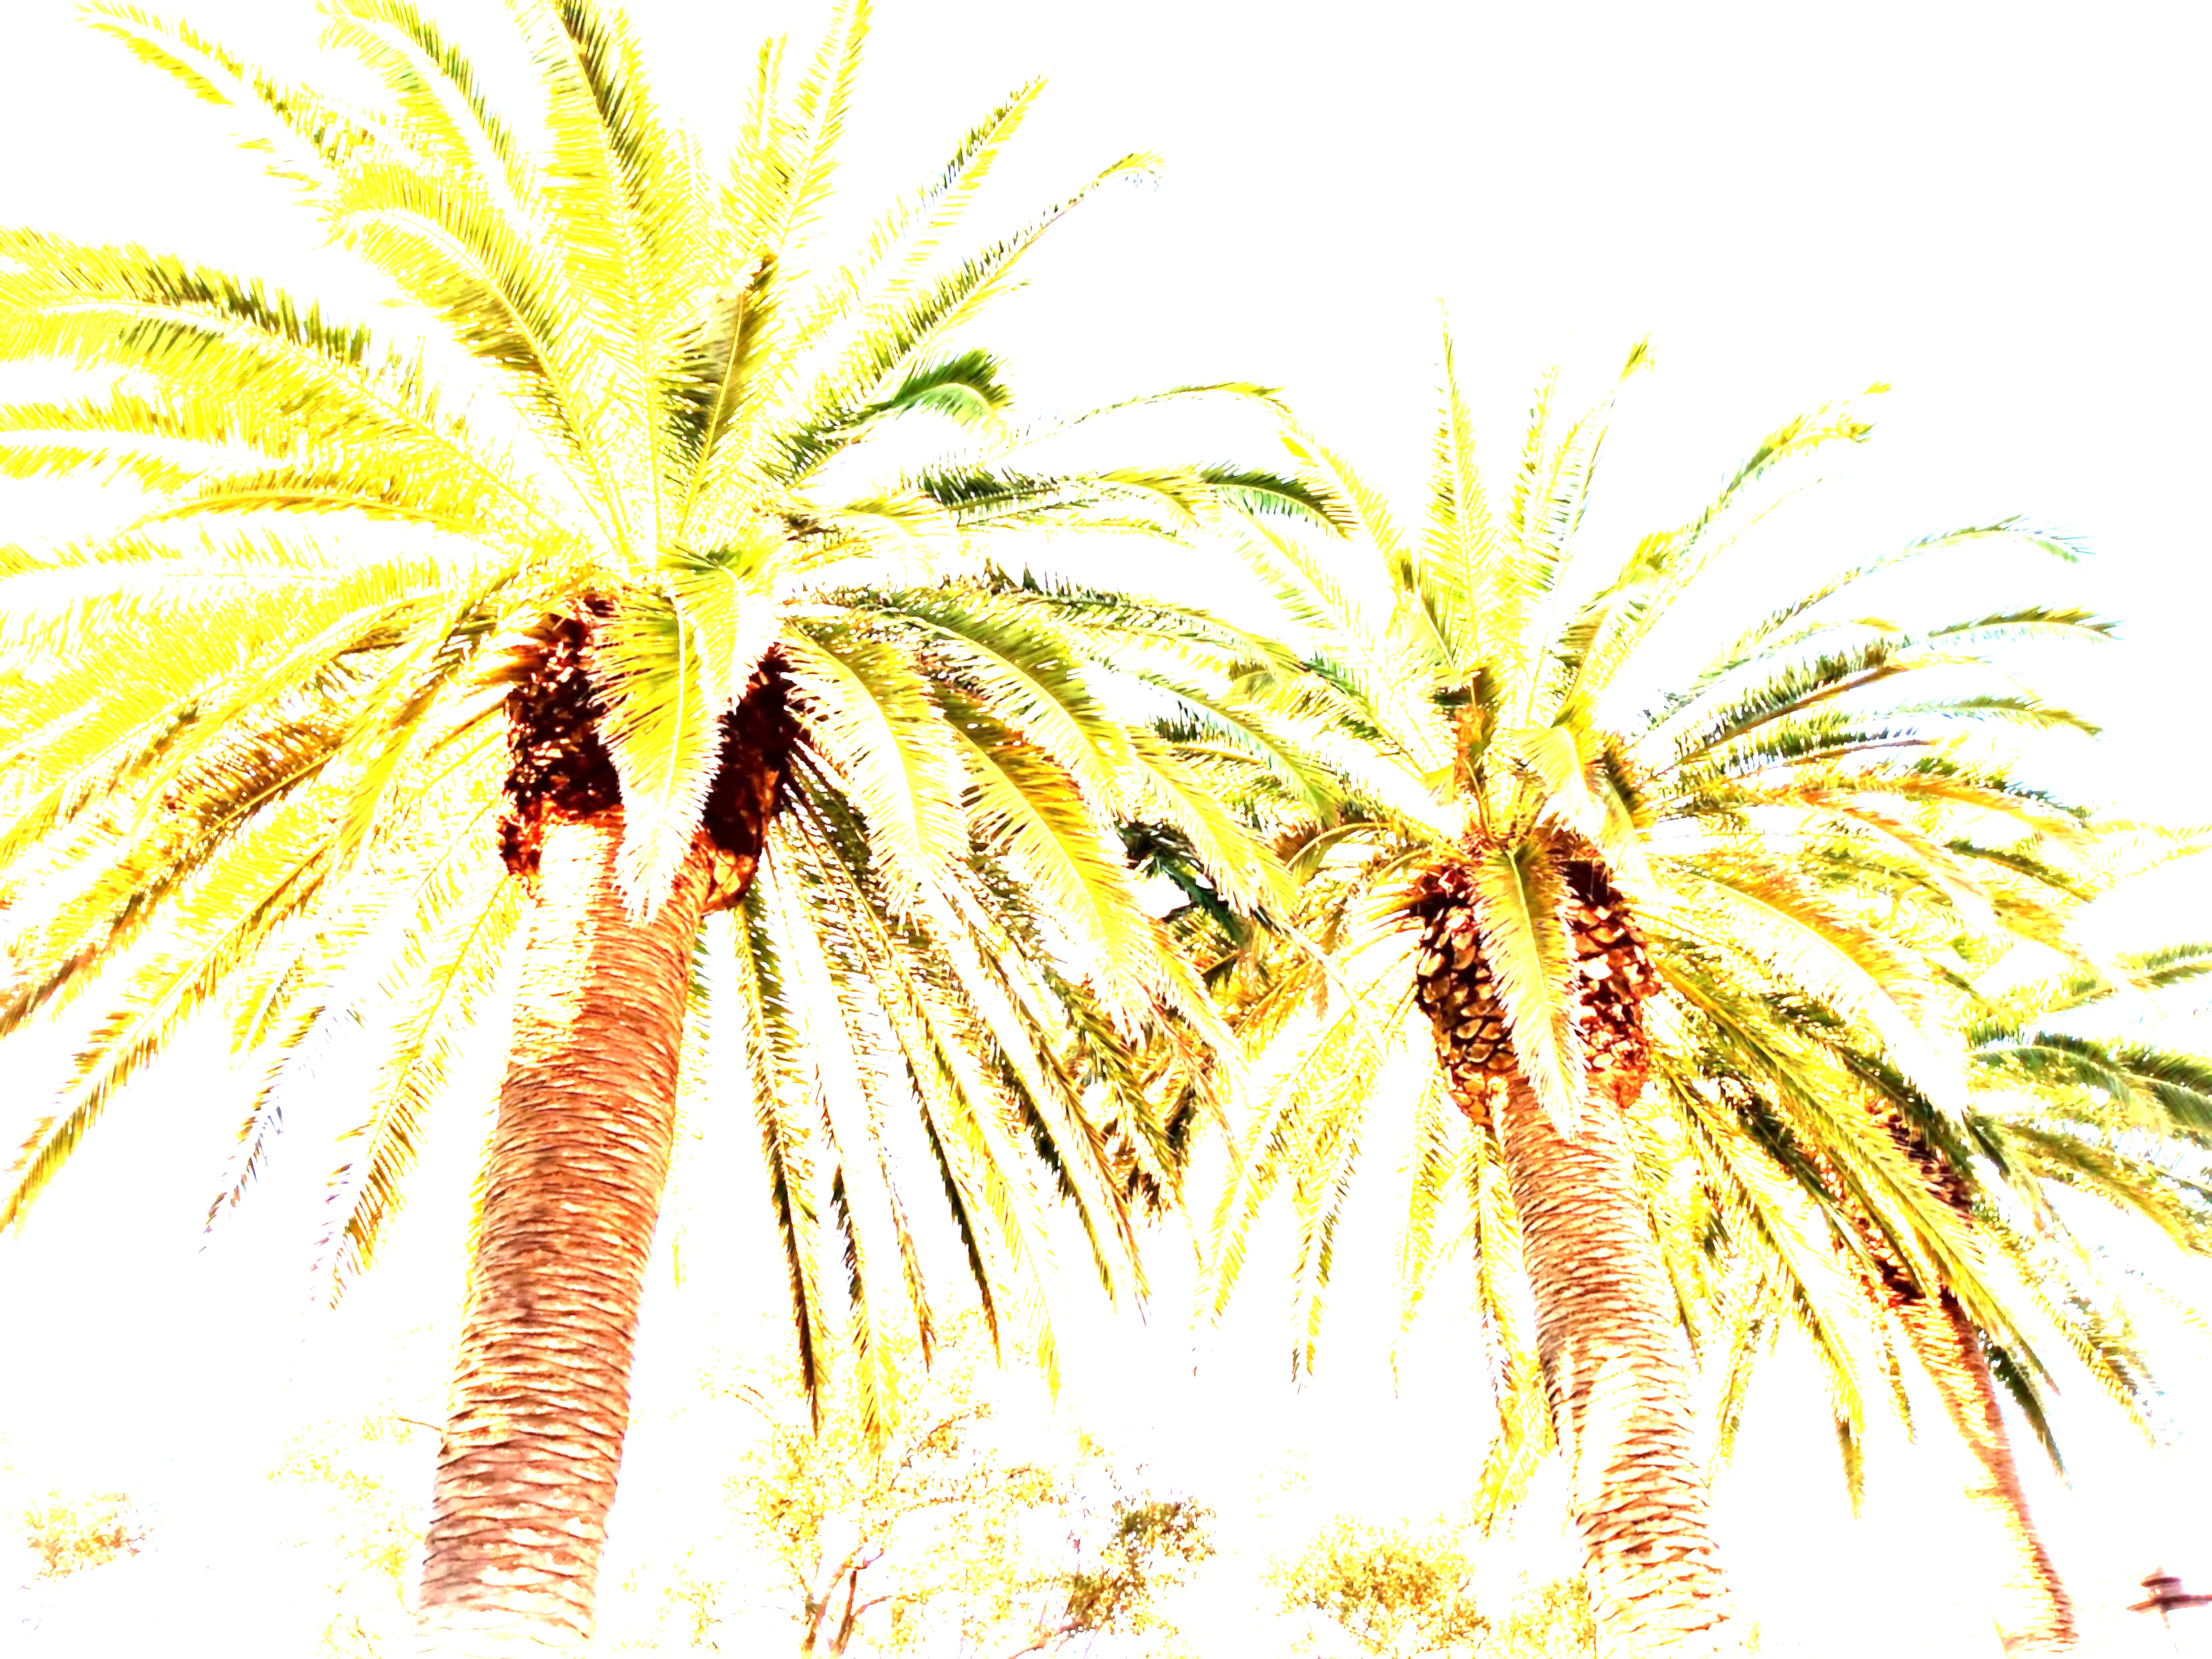

In [10]:
# Imports
import numpy as np
import cv2

# Read in the image
img_src = cv2.imread('palm_trees.jpg')

# Edge detection (high-pass filter)
# kernel = np.array([[0.0, -1.0, 0.0], 
#                    [-1.0, 4.0, -1.0],
#                    [0.0, -1.0, 0.0]])

# kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

# Filter the source image
img_rst = cv2.filter2D(img_src,-1,kernel)

#save result image
cv2.imwrite('palm_trees_edge.jpg', img_rst)

Image(filename='palm_trees_edge.jpg', width=500)

CLICK to see image.  https://github.com/lambdaschool/data-science-canvas-images/blob/main/unit_4/sprint_3/mod2_obj1_palm_trees_edge.png

Challenge
Try out the convolution process on an image of your own! Is the edge detection filter actually finding what you think are the edges in your image? For a stretch goal, try implementing a low-pass filter. The filter kernel would look like this for a 5x5 kernel:

In [9]:
kernel = np.array([[1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1]])
kernel = kernel/sum(kernel)

Additional Resources
A Comprehensive Guide to Convolutional Neural Networks https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
A Beginner's Guide to Convolutional Neural Networks https://wiki.pathmind.com/convolutional-network

# Objective 02 - Apply a Convolutional Neural Network to a Classification Task


## Overview
A convolutional neural network includes a convolutional layer that maps regions of the input image to the responsible neurons. They also have a "pooling" layer, which we discussed earlier in the module.

After the convolution and a few other layers as needed, we have the output layer and our complete model architecture.

Let's implement a CNN and see what sort of results we can get!


# Follow Along
The example below will use a CNN to classify digits in the MNIST dataset. Some of the following code has been adapted from this website.  https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/  Remember that images are represented as a matrix of pixels, where the pixel's value is the "intensity" of the color in that location. Therefore, color images would need to be represented by three separate pixel matrices, one for each RGB color.

The MNIST images are just represented by a single matrix in grayscale. The dataset is available through the Keras datasets.

In [1]:
# Some example code from: Machine Learning Mastery

# Imports
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

# Look at the training/testing sizes
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# Plot the first nine images
for i in range(3):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

# plt.show()

plt.clf()

2022-04-17 21:14:25.364274: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-17 21:14:25.364317: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


<Figure size 432x288 with 0 Axes>


We have 60,000 images to use for training and another 10,000 for testing. For input into the neural network, we need to reshape the data to have 60000 28x28x1 matrices.

We also need to one-hot encode the target array to represent the digits between 0 and 9.


In [2]:
#  Check these before and after conversions below.
print(trainX.shape)
print(testX.shape)
print(trainy.shape)
print(testy.shape)
print(trainX.dtype)
print(testX.dtype)
print(trainy.dtype)
print(testy.dtype)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
uint8
uint8
uint8
uint8


In [3]:
# Reshape the training images
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
print(trainX.shape)
print(testX.shape)

# One hot encode target values
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

trainy = to_categorical(trainy)
testy = to_categorical(testy)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


The data also needs to be scaled so that each pixel has a value between 0 and 1; currently they can have a value between 0 and 255 so we'll just divide by 255.

In [4]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# Convert the images
trainX_norm, testX_norm = prep_pixels(trainX, testX)

Now that we have the images ready, we'll set up the model. It will include convolutional layers, a pooling layer, and a few other layers, including the output corresponding to the ten digits we're trying to classify.


In [5]:
# Import keras models, layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

# Set-up the model
model = Sequential()

# Convolutional layer with a 3x3 kernel
model.add(Conv2D(32, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform',
                 input_shape=(28, 28, 1)))

# Pooling layer (takes the max value)
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

# Dense hidden layer
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

2022-04-17 21:15:26.436649: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-17 21:15:26.436697: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-17 21:15:26.436716: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Opti17): /proc/driver/nvidia/version does not exist
2022-04-17 21:15:26.437015: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


And now we can train our model. As usual, this can take awhile.

In [7]:

model.fit(trainX_norm,
          trainy,
          epochs=5,
          batch_size=32,
          validation_data=(testX_norm, testy),
          verbose=1,
          workers=7)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0457 - accuracy: 0.9865 - val_loss: 0.0541 - val_accuracy: 0.9825
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0297 - accuracy: 0.9911 - val_loss: 0.0434 - val_accuracy: 0.9856
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0409 - val_accuracy: 0.9867
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0154 - accuracy: 0.9955 - val_loss: 0.0406 - val_accuracy: 0.9859
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0098 - accuracy: 0.9974 - val_loss: 0.0391 - val_accuracy: 0.9885


Finally, we'll evaluate on the test set; the second number displayed is the accuracy.


In [8]:
model.evaluate(testX, testy, verbose=1)
# [26.49790382385254, 0.9621000289916992]

313/313 [==============================] - 1s 4ms/step - loss: 34.8278 - accuracy: 0.9622


[34.827789306640625, 0.9621999859809875]

## Challenge
For this challenge, you can try changing the parameters of the convolutional layer, such as the kernel size.

## Additional Resources
How to Develop a Convolutional Neural Network https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/ 
A Comprehensive Guide to Convolutional Neural Networks https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53  

# Objective 03 - Use a Pre-Trained Convolution Neural Network for Image Classification
## Overview
In this last part of the module, we will take advantage of the transfer learning process, where we store what we learned from one type of problem and apply it to a different problem. Because neural networks for image classification take a long time to train, we can use pre-trained models. For image classification, the model has likely been trained on a very large number of images so that you can use it for general image classification tasks.

The one we will demonstrate here and in the Guided Project is the ResNet50  (Links to an external site.)pre-trained classifier available as a Keras application.

## Follow Along